# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime
import openweathermapy.core as ow
# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# L# Get random longitude
lon = np.random.uniform (low=-1.8, high=1.8, size=(2000)) * 100

# Get random Latitude
lat = np.random.uniform (low=-0.9, high=0.9, size=(2000)) * 100

# Combine random latitude and longitude coordinates
coordinates = np.stack((lat, lon), axis=-1)


In [3]:
# Create cities data frame
cities_raw = []
for coordinate_pair in coordinates:
    lat, lon = coordinate_pair
    cities_raw.append(citipy.nearest_city(lat, lon))
    
dup_items = set()
cities = []
for x in cities_raw:
    if x not in dup_items:
        cities.append(x)
        dup_items.add(x)
    
print(len(cities))

755


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"

# set up lists to hold reponse info
ow_date = []
ow_city = []
ow_country = []
ow_cloud = []
ow_humid = []
ow_lat = []
ow_lon = []
ow_maxtmp = []
ow_wind = []

x = 1
    
# Build query URL
for city in cities:
    
   
    name = city.city_name
    print("Retreiving data for City #"+ str(x) + " of " + str((len(cities))) + " ... "  + name )
    
    query_url = url + "appid=" + api_key + "&q=" + name + "&units=" + units
    print(query_url)
    print(50 * "-")
    
    # Get weather data
    weather_response = requests.get(query_url)
    weather_json = weather_response.json()
    
   
    # Catch wrong city name exception
    try:
   
        ow_date.append(weather_json['dt'])
        ow_city.append(weather_json['name'])
        ow_country.append(weather_json['sys']['country'])
        ow_lat.append(weather_json['coord']['lat'])
        ow_lon.append(weather_json['coord']['lon'])
        ow_maxtmp.append(weather_json['main']['temp_max'])
        ow_humid.append(weather_json['main']['humidity'])
        ow_cloud.append(weather_json['clouds']['all'])
        ow_wind.append(weather_json['wind']['speed'])
        
        x = x + 1
            
    except:
             print("Oops! That was a wrong city name. Try again...")
             print(50 * "-")
            
   
    # Timer to pause for a second after each record - not too exceed 60 API calls per minute limit
    time.sleep(1)


Retreiving data for City #1 of 755 ... qaanaaq
http://api.openweathermap.org/data/2.5/weather?appid=16268bcfd5489f25d72b6f887292f84a&q=qaanaaq&units=Imperial
--------------------------------------------------
Retreiving data for City #2 of 755 ... albany
http://api.openweathermap.org/data/2.5/weather?appid=16268bcfd5489f25d72b6f887292f84a&q=albany&units=Imperial
--------------------------------------------------
Retreiving data for City #3 of 755 ... yerani
http://api.openweathermap.org/data/2.5/weather?appid=16268bcfd5489f25d72b6f887292f84a&q=yerani&units=Imperial
--------------------------------------------------
Oops! That was a wrong city name. Try again...
--------------------------------------------------
Retreiving data for City #3 of 755 ... alofi
http://api.openweathermap.org/data/2.5/weather?appid=16268bcfd5489f25d72b6f887292f84a&q=alofi&units=Imperial
--------------------------------------------------
Retreiving data for City #4 of 755 ... tessalit
http://api.openweathermap.

Oops! That was a wrong city name. Try again...
--------------------------------------------------
Retreiving data for City #30 of 755 ... mongo
http://api.openweathermap.org/data/2.5/weather?appid=16268bcfd5489f25d72b6f887292f84a&q=mongo&units=Imperial
--------------------------------------------------
Retreiving data for City #31 of 755 ... ostrovnoy
http://api.openweathermap.org/data/2.5/weather?appid=16268bcfd5489f25d72b6f887292f84a&q=ostrovnoy&units=Imperial
--------------------------------------------------
Retreiving data for City #32 of 755 ... hobart
http://api.openweathermap.org/data/2.5/weather?appid=16268bcfd5489f25d72b6f887292f84a&q=hobart&units=Imperial
--------------------------------------------------
Retreiving data for City #33 of 755 ... harlingen
http://api.openweathermap.org/data/2.5/weather?appid=16268bcfd5489f25d72b6f887292f84a&q=harlingen&units=Imperial
--------------------------------------------------
Retreiving data for City #34 of 755 ... tsihombe
http://api.

Retreiving data for City #62 of 755 ... tigil
http://api.openweathermap.org/data/2.5/weather?appid=16268bcfd5489f25d72b6f887292f84a&q=tigil&units=Imperial
--------------------------------------------------
Retreiving data for City #63 of 755 ... rikitea
http://api.openweathermap.org/data/2.5/weather?appid=16268bcfd5489f25d72b6f887292f84a&q=rikitea&units=Imperial
--------------------------------------------------
Retreiving data for City #64 of 755 ... salalah
http://api.openweathermap.org/data/2.5/weather?appid=16268bcfd5489f25d72b6f887292f84a&q=salalah&units=Imperial
--------------------------------------------------
Retreiving data for City #65 of 755 ... thompson
http://api.openweathermap.org/data/2.5/weather?appid=16268bcfd5489f25d72b6f887292f84a&q=thompson&units=Imperial
--------------------------------------------------
Retreiving data for City #66 of 755 ... newport
http://api.openweathermap.org/data/2.5/weather?appid=16268bcfd5489f25d72b6f887292f84a&q=newport&units=Imperial
---

Oops! That was a wrong city name. Try again...
--------------------------------------------------
Retreiving data for City #94 of 755 ... marsh harbour
http://api.openweathermap.org/data/2.5/weather?appid=16268bcfd5489f25d72b6f887292f84a&q=marsh harbour&units=Imperial
--------------------------------------------------
Retreiving data for City #95 of 755 ... khatanga
http://api.openweathermap.org/data/2.5/weather?appid=16268bcfd5489f25d72b6f887292f84a&q=khatanga&units=Imperial
--------------------------------------------------
Retreiving data for City #96 of 755 ... tabou
http://api.openweathermap.org/data/2.5/weather?appid=16268bcfd5489f25d72b6f887292f84a&q=tabou&units=Imperial
--------------------------------------------------
Retreiving data for City #97 of 755 ... aswan
http://api.openweathermap.org/data/2.5/weather?appid=16268bcfd5489f25d72b6f887292f84a&q=aswan&units=Imperial
--------------------------------------------------
Retreiving data for City #98 of 755 ... chokurdakh
http:

Retreiving data for City #128 of 755 ... korla
http://api.openweathermap.org/data/2.5/weather?appid=16268bcfd5489f25d72b6f887292f84a&q=korla&units=Imperial
--------------------------------------------------
Oops! That was a wrong city name. Try again...
--------------------------------------------------
Retreiving data for City #128 of 755 ... caborca
http://api.openweathermap.org/data/2.5/weather?appid=16268bcfd5489f25d72b6f887292f84a&q=caborca&units=Imperial
--------------------------------------------------
Retreiving data for City #129 of 755 ... adrar
http://api.openweathermap.org/data/2.5/weather?appid=16268bcfd5489f25d72b6f887292f84a&q=adrar&units=Imperial
--------------------------------------------------
Retreiving data for City #130 of 755 ... jamestown
http://api.openweathermap.org/data/2.5/weather?appid=16268bcfd5489f25d72b6f887292f84a&q=jamestown&units=Imperial
--------------------------------------------------
Retreiving data for City #131 of 755 ... izumo
http://api.open

Retreiving data for City #158 of 755 ... langxiang
http://api.openweathermap.org/data/2.5/weather?appid=16268bcfd5489f25d72b6f887292f84a&q=langxiang&units=Imperial
--------------------------------------------------
Retreiving data for City #159 of 755 ... sola
http://api.openweathermap.org/data/2.5/weather?appid=16268bcfd5489f25d72b6f887292f84a&q=sola&units=Imperial
--------------------------------------------------
Retreiving data for City #160 of 755 ... port elizabeth
http://api.openweathermap.org/data/2.5/weather?appid=16268bcfd5489f25d72b6f887292f84a&q=port elizabeth&units=Imperial
--------------------------------------------------
Retreiving data for City #161 of 755 ... lannion
http://api.openweathermap.org/data/2.5/weather?appid=16268bcfd5489f25d72b6f887292f84a&q=lannion&units=Imperial
--------------------------------------------------
Retreiving data for City #162 of 755 ... maningrida
http://api.openweathermap.org/data/2.5/weather?appid=16268bcfd5489f25d72b6f887292f84a&q=mani

Retreiving data for City #195 of 755 ... hilo
http://api.openweathermap.org/data/2.5/weather?appid=16268bcfd5489f25d72b6f887292f84a&q=hilo&units=Imperial
--------------------------------------------------
Retreiving data for City #196 of 755 ... trairi
http://api.openweathermap.org/data/2.5/weather?appid=16268bcfd5489f25d72b6f887292f84a&q=trairi&units=Imperial
--------------------------------------------------
Retreiving data for City #197 of 755 ... hokitika
http://api.openweathermap.org/data/2.5/weather?appid=16268bcfd5489f25d72b6f887292f84a&q=hokitika&units=Imperial
--------------------------------------------------
Retreiving data for City #198 of 755 ... carutapera
http://api.openweathermap.org/data/2.5/weather?appid=16268bcfd5489f25d72b6f887292f84a&q=carutapera&units=Imperial
--------------------------------------------------
Retreiving data for City #199 of 755 ... puerto narino
http://api.openweathermap.org/data/2.5/weather?appid=16268bcfd5489f25d72b6f887292f84a&q=puerto narino

Retreiving data for City #226 of 755 ... santa maria
http://api.openweathermap.org/data/2.5/weather?appid=16268bcfd5489f25d72b6f887292f84a&q=santa maria&units=Imperial
--------------------------------------------------
Retreiving data for City #227 of 755 ... monywa
http://api.openweathermap.org/data/2.5/weather?appid=16268bcfd5489f25d72b6f887292f84a&q=monywa&units=Imperial
--------------------------------------------------
Retreiving data for City #228 of 755 ... warqla
http://api.openweathermap.org/data/2.5/weather?appid=16268bcfd5489f25d72b6f887292f84a&q=warqla&units=Imperial
--------------------------------------------------
Oops! That was a wrong city name. Try again...
--------------------------------------------------
Retreiving data for City #228 of 755 ... zeya
http://api.openweathermap.org/data/2.5/weather?appid=16268bcfd5489f25d72b6f887292f84a&q=zeya&units=Imperial
--------------------------------------------------
Retreiving data for City #229 of 755 ... selishche
http://ap

Retreiving data for City #259 of 755 ... seymchan
http://api.openweathermap.org/data/2.5/weather?appid=16268bcfd5489f25d72b6f887292f84a&q=seymchan&units=Imperial
--------------------------------------------------
Retreiving data for City #260 of 755 ... honningsvag
http://api.openweathermap.org/data/2.5/weather?appid=16268bcfd5489f25d72b6f887292f84a&q=honningsvag&units=Imperial
--------------------------------------------------
Retreiving data for City #261 of 755 ... barbar
http://api.openweathermap.org/data/2.5/weather?appid=16268bcfd5489f25d72b6f887292f84a&q=barbar&units=Imperial
--------------------------------------------------
Oops! That was a wrong city name. Try again...
--------------------------------------------------
Retreiving data for City #261 of 755 ... samarai
http://api.openweathermap.org/data/2.5/weather?appid=16268bcfd5489f25d72b6f887292f84a&q=samarai&units=Imperial
--------------------------------------------------
Retreiving data for City #262 of 755 ... clinton
h

Retreiving data for City #293 of 755 ... laguna
http://api.openweathermap.org/data/2.5/weather?appid=16268bcfd5489f25d72b6f887292f84a&q=laguna&units=Imperial
--------------------------------------------------
Retreiving data for City #294 of 755 ... nome
http://api.openweathermap.org/data/2.5/weather?appid=16268bcfd5489f25d72b6f887292f84a&q=nome&units=Imperial
--------------------------------------------------
Retreiving data for City #295 of 755 ... azimur
http://api.openweathermap.org/data/2.5/weather?appid=16268bcfd5489f25d72b6f887292f84a&q=azimur&units=Imperial
--------------------------------------------------
Oops! That was a wrong city name. Try again...
--------------------------------------------------
Retreiving data for City #295 of 755 ... valparaiso
http://api.openweathermap.org/data/2.5/weather?appid=16268bcfd5489f25d72b6f887292f84a&q=valparaiso&units=Imperial
--------------------------------------------------
Retreiving data for City #296 of 755 ... cabo san lucas
http:/

Oops! That was a wrong city name. Try again...
--------------------------------------------------
Retreiving data for City #328 of 755 ... tocopilla
http://api.openweathermap.org/data/2.5/weather?appid=16268bcfd5489f25d72b6f887292f84a&q=tocopilla&units=Imperial
--------------------------------------------------
Retreiving data for City #329 of 755 ... bengkalis
http://api.openweathermap.org/data/2.5/weather?appid=16268bcfd5489f25d72b6f887292f84a&q=bengkalis&units=Imperial
--------------------------------------------------
Oops! That was a wrong city name. Try again...
--------------------------------------------------
Retreiving data for City #329 of 755 ... parana
http://api.openweathermap.org/data/2.5/weather?appid=16268bcfd5489f25d72b6f887292f84a&q=parana&units=Imperial
--------------------------------------------------
Retreiving data for City #330 of 755 ... swift current
http://api.openweathermap.org/data/2.5/weather?appid=16268bcfd5489f25d72b6f887292f84a&q=swift current&units=Im

Retreiving data for City #361 of 755 ... grootfontein
http://api.openweathermap.org/data/2.5/weather?appid=16268bcfd5489f25d72b6f887292f84a&q=grootfontein&units=Imperial
--------------------------------------------------
Retreiving data for City #362 of 755 ... otane
http://api.openweathermap.org/data/2.5/weather?appid=16268bcfd5489f25d72b6f887292f84a&q=otane&units=Imperial
--------------------------------------------------
Retreiving data for City #363 of 755 ... basingstoke
http://api.openweathermap.org/data/2.5/weather?appid=16268bcfd5489f25d72b6f887292f84a&q=basingstoke&units=Imperial
--------------------------------------------------
Retreiving data for City #364 of 755 ... inskoy
http://api.openweathermap.org/data/2.5/weather?appid=16268bcfd5489f25d72b6f887292f84a&q=inskoy&units=Imperial
--------------------------------------------------
Retreiving data for City #365 of 755 ... ulaangom
http://api.openweathermap.org/data/2.5/weather?appid=16268bcfd5489f25d72b6f887292f84a&q=ulaang

Retreiving data for City #395 of 755 ... omboue
http://api.openweathermap.org/data/2.5/weather?appid=16268bcfd5489f25d72b6f887292f84a&q=omboue&units=Imperial
--------------------------------------------------
Retreiving data for City #396 of 755 ... bandarbeyla
http://api.openweathermap.org/data/2.5/weather?appid=16268bcfd5489f25d72b6f887292f84a&q=bandarbeyla&units=Imperial
--------------------------------------------------
Retreiving data for City #397 of 755 ... dubenskiy
http://api.openweathermap.org/data/2.5/weather?appid=16268bcfd5489f25d72b6f887292f84a&q=dubenskiy&units=Imperial
--------------------------------------------------
Oops! That was a wrong city name. Try again...
--------------------------------------------------
Retreiving data for City #397 of 755 ... satna
http://api.openweathermap.org/data/2.5/weather?appid=16268bcfd5489f25d72b6f887292f84a&q=satna&units=Imperial
--------------------------------------------------
Retreiving data for City #398 of 755 ... mamakan
htt

Retreiving data for City #433 of 755 ... bad hersfeld
http://api.openweathermap.org/data/2.5/weather?appid=16268bcfd5489f25d72b6f887292f84a&q=bad hersfeld&units=Imperial
--------------------------------------------------
Retreiving data for City #434 of 755 ... igrim
http://api.openweathermap.org/data/2.5/weather?appid=16268bcfd5489f25d72b6f887292f84a&q=igrim&units=Imperial
--------------------------------------------------
Retreiving data for City #435 of 755 ... parrita
http://api.openweathermap.org/data/2.5/weather?appid=16268bcfd5489f25d72b6f887292f84a&q=parrita&units=Imperial
--------------------------------------------------
Retreiving data for City #436 of 755 ... santa cruz
http://api.openweathermap.org/data/2.5/weather?appid=16268bcfd5489f25d72b6f887292f84a&q=santa cruz&units=Imperial
--------------------------------------------------
Retreiving data for City #437 of 755 ... ranong
http://api.openweathermap.org/data/2.5/weather?appid=16268bcfd5489f25d72b6f887292f84a&q=ranong&u

Oops! That was a wrong city name. Try again...
--------------------------------------------------
Retreiving data for City #465 of 755 ... tomatlan
http://api.openweathermap.org/data/2.5/weather?appid=16268bcfd5489f25d72b6f887292f84a&q=tomatlan&units=Imperial
--------------------------------------------------
Retreiving data for City #466 of 755 ... oranjemund
http://api.openweathermap.org/data/2.5/weather?appid=16268bcfd5489f25d72b6f887292f84a&q=oranjemund&units=Imperial
--------------------------------------------------
Retreiving data for City #467 of 755 ... koundara
http://api.openweathermap.org/data/2.5/weather?appid=16268bcfd5489f25d72b6f887292f84a&q=koundara&units=Imperial
--------------------------------------------------
Retreiving data for City #468 of 755 ... mapiripan
http://api.openweathermap.org/data/2.5/weather?appid=16268bcfd5489f25d72b6f887292f84a&q=mapiripan&units=Imperial
--------------------------------------------------
Retreiving data for City #469 of 755 ... bil

Retreiving data for City #498 of 755 ... agadez
http://api.openweathermap.org/data/2.5/weather?appid=16268bcfd5489f25d72b6f887292f84a&q=agadez&units=Imperial
--------------------------------------------------
Retreiving data for City #499 of 755 ... srednekolymsk
http://api.openweathermap.org/data/2.5/weather?appid=16268bcfd5489f25d72b6f887292f84a&q=srednekolymsk&units=Imperial
--------------------------------------------------
Retreiving data for City #500 of 755 ... nikolskoye-na-cheremshane
http://api.openweathermap.org/data/2.5/weather?appid=16268bcfd5489f25d72b6f887292f84a&q=nikolskoye-na-cheremshane&units=Imperial
--------------------------------------------------
Oops! That was a wrong city name. Try again...
--------------------------------------------------
Retreiving data for City #500 of 755 ... clinton
http://api.openweathermap.org/data/2.5/weather?appid=16268bcfd5489f25d72b6f887292f84a&q=clinton&units=Imperial
--------------------------------------------------
Retreiving d

Retreiving data for City #532 of 755 ... borogontsy
http://api.openweathermap.org/data/2.5/weather?appid=16268bcfd5489f25d72b6f887292f84a&q=borogontsy&units=Imperial
--------------------------------------------------
Retreiving data for City #533 of 755 ... saint-augustin
http://api.openweathermap.org/data/2.5/weather?appid=16268bcfd5489f25d72b6f887292f84a&q=saint-augustin&units=Imperial
--------------------------------------------------
Retreiving data for City #534 of 755 ... sirjan
http://api.openweathermap.org/data/2.5/weather?appid=16268bcfd5489f25d72b6f887292f84a&q=sirjan&units=Imperial
--------------------------------------------------
Retreiving data for City #535 of 755 ... jumla
http://api.openweathermap.org/data/2.5/weather?appid=16268bcfd5489f25d72b6f887292f84a&q=jumla&units=Imperial
--------------------------------------------------
Retreiving data for City #536 of 755 ... krasnokholm
http://api.openweathermap.org/data/2.5/weather?appid=16268bcfd5489f25d72b6f887292f84a&q=k

Retreiving data for City #568 of 755 ... leh
http://api.openweathermap.org/data/2.5/weather?appid=16268bcfd5489f25d72b6f887292f84a&q=leh&units=Imperial
--------------------------------------------------
Retreiving data for City #569 of 755 ... anjar
http://api.openweathermap.org/data/2.5/weather?appid=16268bcfd5489f25d72b6f887292f84a&q=anjar&units=Imperial
--------------------------------------------------
Retreiving data for City #570 of 755 ... ponta do sol
http://api.openweathermap.org/data/2.5/weather?appid=16268bcfd5489f25d72b6f887292f84a&q=ponta do sol&units=Imperial
--------------------------------------------------
Retreiving data for City #571 of 755 ... viligili
http://api.openweathermap.org/data/2.5/weather?appid=16268bcfd5489f25d72b6f887292f84a&q=viligili&units=Imperial
--------------------------------------------------
Oops! That was a wrong city name. Try again...
--------------------------------------------------
Retreiving data for City #571 of 755 ... agaro
http://api.

Retreiving data for City #603 of 755 ... suamico
http://api.openweathermap.org/data/2.5/weather?appid=16268bcfd5489f25d72b6f887292f84a&q=suamico&units=Imperial
--------------------------------------------------
Retreiving data for City #604 of 755 ... fort-shevchenko
http://api.openweathermap.org/data/2.5/weather?appid=16268bcfd5489f25d72b6f887292f84a&q=fort-shevchenko&units=Imperial
--------------------------------------------------
Retreiving data for City #605 of 755 ... staraya toropa
http://api.openweathermap.org/data/2.5/weather?appid=16268bcfd5489f25d72b6f887292f84a&q=staraya toropa&units=Imperial
--------------------------------------------------
Retreiving data for City #606 of 755 ... qena
http://api.openweathermap.org/data/2.5/weather?appid=16268bcfd5489f25d72b6f887292f84a&q=qena&units=Imperial
--------------------------------------------------
Retreiving data for City #607 of 755 ... bitung
http://api.openweathermap.org/data/2.5/weather?appid=16268bcfd5489f25d72b6f887292f84

Oops! That was a wrong city name. Try again...
--------------------------------------------------
Retreiving data for City #637 of 755 ... salinas
http://api.openweathermap.org/data/2.5/weather?appid=16268bcfd5489f25d72b6f887292f84a&q=salinas&units=Imperial
--------------------------------------------------
Retreiving data for City #638 of 755 ... haibowan
http://api.openweathermap.org/data/2.5/weather?appid=16268bcfd5489f25d72b6f887292f84a&q=haibowan&units=Imperial
--------------------------------------------------
Oops! That was a wrong city name. Try again...
--------------------------------------------------
Retreiving data for City #638 of 755 ... lemon tree passage
http://api.openweathermap.org/data/2.5/weather?appid=16268bcfd5489f25d72b6f887292f84a&q=lemon tree passage&units=Imperial
--------------------------------------------------
Retreiving data for City #639 of 755 ... pushkino
http://api.openweathermap.org/data/2.5/weather?appid=16268bcfd5489f25d72b6f887292f84a&q=pushkino&

Retreiving data for City #671 of 755 ... awka
http://api.openweathermap.org/data/2.5/weather?appid=16268bcfd5489f25d72b6f887292f84a&q=awka&units=Imperial
--------------------------------------------------
Retreiving data for City #672 of 755 ... los llanos de aridane
http://api.openweathermap.org/data/2.5/weather?appid=16268bcfd5489f25d72b6f887292f84a&q=los llanos de aridane&units=Imperial
--------------------------------------------------
Retreiving data for City #673 of 755 ... altamont
http://api.openweathermap.org/data/2.5/weather?appid=16268bcfd5489f25d72b6f887292f84a&q=altamont&units=Imperial
--------------------------------------------------
Retreiving data for City #674 of 755 ... gamba
http://api.openweathermap.org/data/2.5/weather?appid=16268bcfd5489f25d72b6f887292f84a&q=gamba&units=Imperial
--------------------------------------------------
Retreiving data for City #675 of 755 ... san jose
http://api.openweathermap.org/data/2.5/weather?appid=16268bcfd5489f25d72b6f887292f84a&

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# create a data frame from retreived weather data
weather_dict = {
    "Date": ow_date,
    "City": ow_city,
    "Country": ow_country,
    "Latitude": ow_lat,
    "Longitude": ow_lon,
    "MaxTemp": ow_maxtmp,
    "Humidity": ow_humid,
    "Cloudiness": ow_cloud,
    "Wind Speed": ow_wind
}


weather_data = pd.DataFrame(weather_dict)

# Remove duplicates
weather_data = weather_data.drop_duplicates(["City"], keep ='first')

weather_data.head(10)

,Date,City,Country,Latitude,Longitude,MaxTemp,Humidity,Cloudiness,Wind Speed
0,1573323042,Qaanaaq,GL,77.48,-69.36,-5.57,48,0,5.41
1,1573323043,Albany,US,42.65,-73.75,37.99,47,1,10.29
2,1573323046,Alofi,NU,-19.06,-169.92,69.80,94,7,2.24
3,1573323047,Tessalit,ML,20.20,1.01,85.86,14,100,15.68
4,1573322956,Olive Branch,US,34.96,-89.83,53.01,34,5,6.93
5,1573323049,Grand Gaube,MU,-20.01,57.66,73.99,83,40,4.70
6,1573323050,Waipawa,NZ,-39.94,176.59,51.01,90,33,5.53
7,1573323052,Vaini,IN,15.34,74.49,67.87,92,14,1.99
8,1573323053,Tselinnoye,UA,45.90,34.18,58.30,77,0,8.23
9,1573323055,Santo Amaro da Imperatriz,BR,-27.69,-48.78,80.01,100,75,5.82


In [6]:
weather_data.count()

Date          676
City          676
Country       676
Latitude      676
Longitude     676
MaxTemp       676
Humidity      676
Cloudiness    676
Wind Speed    676
dtype: int64

In [7]:
# Save csv file
weather_data.to_csv("Weather_Data.csv", index=False)

In [8]:
# Convert Unix Time Stamp to regular date
tmpDate = datetime.datetime.fromtimestamp(int(weather_data["Date"][0])).strftime('%Y-%m-%d')

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

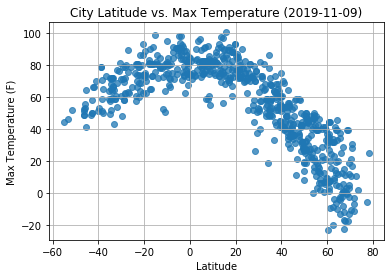

In [9]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Latitude"],weather_data["MaxTemp"], marker="o", alpha = 0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (" + tmpDate + ")")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)

# Save the figure
plt.savefig("../Images/MaxTmp.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

FileNotFoundError: [Errno 2] No such file or directory: '..Images/Humidity.png'

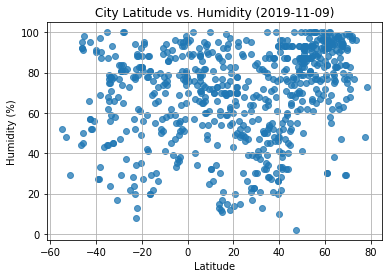

In [10]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Latitude"],weather_data["Humidity"], marker="o", alpha = 0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (" + tmpDate + ")")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("..Images/Humidity.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

In [ ]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Latitude"],weather_data["Cloudiness"], marker="o", alpha = 0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (" + tmpDate + ")")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("../Images/Cloudiness.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

In [ ]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Latitude"],weather_data["Wind Speed"], marker="o", alpha = 0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (" + tmpDate + ")")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

# Save the figure
plt.savefig("../Images/WindSpeed.png")

# Show plot
plt.show()